In [2]:
!pip install librosa

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import os

In [2]:
import pandas as pd
# Define a custom parser for the text file with tab-separated values
def custom_parser(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
          
            parts = line.strip().split('\t', 1)  
            if len(parts) == 2:  
                utterance_id, transcription = parts
                data.append([utterance_id, transcription])
            else:
               
                data.append([parts[0], ""])

    return pd.DataFrame(data, columns=['utterance_id', 'transcription'])

# Use the custom parser to load the data
text_df = custom_parser('E:\\tts\\SPRING_INX_Punjabi_R1\\train\\text')

# Example: Analyze word frequency
word_count = text_df['transcription'].str.split().apply(len).sum()
print(f'Total number of words: {word_count}')
# Add a new column with word count per sentence
text_df['word_count'] = text_df['transcription'].str.split().apply(len)

# Check the DataFrame with the new column
print(text_df.head(10))


Total number of words: 1249320
         utterance_id                                      transcription  \
0  KaInDe_utt00000001                                              hello   
1  KaInDe_utt00000002                                              hello   
2  KaInDe_utt00000004                                 ਸਤਿ ਸ਼੍ਰੀ ਅਕਾਲ ਮਾਸੀ   
3  KaInDe_utt00000006                                 ਬਸ ਵਧੀਆ ਤੁਸੀਂ ਦੱਸੋ   
4  KaInDe_utt00000007                  ਮੈਂ ਵਧੀਆ ਘਰ ਸਭ ਠੀਕ ਮੰਮੀ ਪਾਪਾ ਦਾਦੀ   
5  KaInDe_utt00000009                           ਜੀ ਸਾਰੇ ਹਾਂਜੀ ਤੁਸੀਂ ਦੱਸੋ   
6  KaInDe_utt00000010  ਮੈਂ ਵਧੀਆ ਸਭ ਵਧੀਆ ਤੇਰੇ ਭੇਣ ਭਰਾ ਵੀ ਵਧੀਆ ਮਸਤੀਆਂ ਕ...   
7  KaInDe_utt00000011        ਪਾ ਦੋ ਬਥੇਰੇ course ਚੱਲਦੇ ਪਏ ਬੱਚਿਆਂ ਨੇ ਅੱਜਕਲ   
8  KaInDe_utt00000012                                       ਕਿਹੜੇ course   
9  KaInDe_utt00000014  ਛੋਟੇ ਛੋਟੇ ਬੱਚੇ ਅਮ institute ਵਿੱਚ ਵੀ ਕਰਦੇ ਪਏ ਨੇ...   

   word_count  
0           1  
1           1  
2           4  
3           4  
4           8  
5           5  
6          29  
7   

In [19]:
import os
# Define file paths (replace 'path/to' with your actual paths)
text_file = r'E:/tts/SPRING_INX_Punjabi_R1/train/text'
utt2dur_file = r'E:/tts/SPRING_INX_Punjabi_R1/train/utt2dur'
spk2utt_file = r'E:/tts/SPRING_INX_Punjabi_R1/train/spk2utt'
utt2spk_file = r'E:/tts/SPRING_INX_Punjabi_R1/train/utt2spk'
wav_file = r'E:/tts/SPRING_INX_Punjabi_R1/train/wav.spc'

def read_file_lines(file_path, delimiter=' ', process=lambda x: x):
    data = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            line_parts = line.strip().split(delimiter)
            data[line_parts[0]] = process(line_parts[1:])
    return data

# 1. Load the text data (utterance_id, transcription)
try:
    text_data = read_file_lines(text_file, delimiter=' ', process=lambda x: ' '.join(x))
    print(f"Loaded {len(text_data)} transcription records.")
except Exception as e:
    print(f"Error loading text data: {e}")

# 2. Load the utt2dur data (utterance duration)
try:
    utt2dur_data = read_file_lines(utt2dur_file, delimiter=' ', process=lambda x: float(x[0]))
    print(f"Loaded {len(utt2dur_data)} utterance durations.")
except Exception as e:
    print(f"Error loading utt2dur data: {e}")

# 3. Load the spk2utt data (mapping from speaker to utterances)
try:
    spk2utt_data = read_file_lines(spk2utt_file, delimiter=' ', process=lambda x: x)
    print(f"Loaded {len(spk2utt_data)} speaker-to-utterance mappings.")
except Exception as e:
    print(f"Error loading spk2utt data: {e}")

# 4. Load utt2spk data (mapping from utterance to speaker)
try:
    utt2spk_data = read_file_lines(utt2spk_file, delimiter=' ', process=lambda x: x[0])
    print(f"Loaded {len(utt2spk_data)} utterance-to-speaker mappings.")
except Exception as e:
    print(f"Error loading utt2spk data: {e}")

# 5. Load wav file paths (list of wav file paths)
try:
    with open(wav_file, 'r', encoding='utf-8') as f:
        wav_paths = [line.strip() for line in f.readlines()]
    print(f"Loaded {len(wav_paths)} wav file paths.")
except Exception as e:
    print(f"Error loading wav file paths: {e}")

# Now let's inspect a few examples from each dataset to ensure everything is correctly loaded
print("\nSample text data (utterance_id -> transcription):")
for i, (utt_id, transcription) in enumerate(text_data.items()):
    if i >= 5: break  # print first 5
    print(f"{utt_id}: {transcription}")

print("\nSample utt2dur data (utterance_id -> duration):")
for i, (utt_id, duration) in enumerate(utt2dur_data.items()):
    if i >= 5: break  # print first 5
    print(f"{utt_id}: {duration} seconds")

print("\nSample spk2utt data (speaker_id -> utterances):")
for i, (spk_id, utterances) in enumerate(spk2utt_data.items()):
    if i >= 5: break  # print first 5
    print(f"{spk_id}: {utterances}")

print("\nSample utt2spk data (utterance_id -> speaker_id):")
for i, (utt_id, spk_id) in enumerate(utt2spk_data.items()):
    if i >= 5: break  # print first 5
    print(f"{utt_id}: {spk_id}")

print("\nSample wav paths:")
for i, wav_path in enumerate(wav_file):
    if i >= 5: break  # print first 5
    print(wav_path)


Loaded 76294 transcription records.
Loaded 76294 utterance durations.
Loaded 76294 speaker-to-utterance mappings.
Loaded 76294 utterance-to-speaker mappings.
Error loading wav file paths: [Errno 2] No such file or directory: 'E:/tts/SPRING_INX_Punjabi_R1/train/wav.spc'

Sample text data (utterance_id -> transcription):
KaInDe_utt00000001	hello: 
KaInDe_utt00000002	hello: 
KaInDe_utt00000004	ਸਤਿ: ਸ਼੍ਰੀ ਅਕਾਲ ਮਾਸੀ
KaInDe_utt00000006	ਬਸ: ਵਧੀਆ ਤੁਸੀਂ ਦੱਸੋ
KaInDe_utt00000007	ਮੈਂ: ਵਧੀਆ ਘਰ ਸਭ ਠੀਕ ਮੰਮੀ ਪਾਪਾ ਦਾਦੀ

Sample utt2dur data (utterance_id -> duration):
KaInDe_utt00000001: 0.654 seconds
KaInDe_utt00000002: 0.889 seconds
KaInDe_utt00000004: 1.716 seconds
KaInDe_utt00000006: 2.338 seconds
KaInDe_utt00000007: 3.931 seconds

Sample spk2utt data (speaker_id -> utterances):
KaInDe_utt00000001: ['KaInDe_utt00000001']
KaInDe_utt00000002: ['KaInDe_utt00000002']
KaInDe_utt00000004: ['KaInDe_utt00000004']
KaInDe_utt00000006: ['KaInDe_utt00000006']
KaInDe_utt00000007: ['KaInDe_utt00000007']

Sample ut

# Utterance Duration Statistics:

In [4]:
import numpy as np

# Basic statistics on utterance durations
durations = list(utt2dur_data.values())
print(f"Number of utterances: {len(durations)}")
print(f"Total duration: {sum(durations):.2f} seconds")
print(f"Average duration: {np.mean(durations):.2f} seconds")
print(f"Max duration: {np.max(durations):.2f} seconds")
print(f"Min duration: {np.min(durations):.2f} seconds")


Number of utterances: 76294
Total duration: 500259.07 seconds
Average duration: 6.56 seconds
Max duration: 29.97 seconds
Min duration: 0.05 seconds


# Distribution of Utterance Durations:

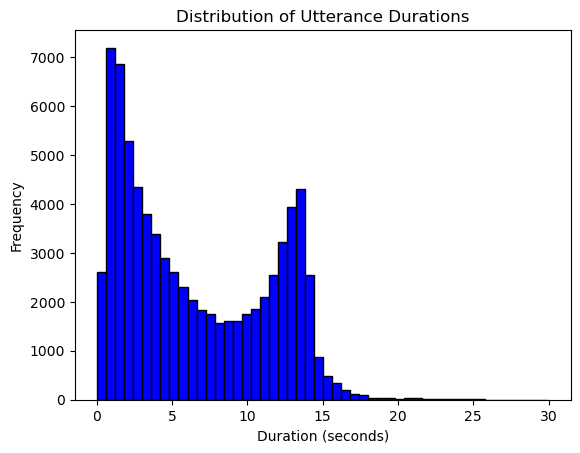

In [5]:
import matplotlib.pyplot as plt

# Histogram of utterance durations
plt.hist(durations, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Utterance Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


# Speaker Analysis:

In [6]:
# Number of utterances per speaker
speaker_counts = {spk: len(utts) for spk, utts in spk2utt_data.items()}

# Display a few statistics about speakers
print(f"Number of speakers: {len(speaker_counts)}")
print(f"Max utterances by a speaker: {max(speaker_counts.values())}")
print(f"Min utterances by a speaker: {min(speaker_counts.values())}")


Number of speakers: 76294
Max utterances by a speaker: 1
Min utterances by a speaker: 1


# Text (Transcription) Analysis:

In [7]:
# Count the total number of words in the transcriptions
word_count = text_df['transcription'].str.split().apply(len).sum()
print(f"Total number of words in the dataset: {word_count}")


Total number of words in the dataset: 1249320


# Most frequent words

In [7]:
from collections import Counter

# Split all transcriptions into words and count their frequencies
all_words = ' '.join(text_df['transcription']).split()
word_freq = Counter(all_words)

# Display the 10 most common words
print("Most common words:")
print(word_freq.most_common(10))


Most common words:
[('ਤੇ', 23210), ('ਹੈ', 22299), ('ਵੀ', 22270), ('ਦੇ', 19427), ('ਨੂੰ', 15767), ('ਉਹ', 14632), ('ਦਾ', 13838), ('ਦੀ', 13805), ('ਨੇ', 13055), ('ਵਿੱਚ', 12448)]


# visualizing the frequency of top 10 words

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2596 (\N{GURMUKHI LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Gurmukhi natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2631 (\N{GURMUKHI VOWEL SIGN EE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2617 (\N{GURMUKHI LETTER HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2632 (\N{GURMUKHI VOWEL SIGN AI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\anaconda3\Lib\site-packages\IPython\

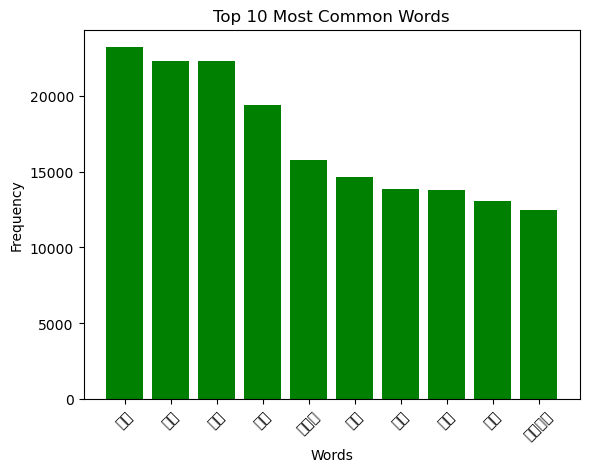

In [9]:
# Visualize the frequency of the top 10 words
common_words = word_freq.most_common(10)
words, counts = zip(*common_words)
plt.bar(words, counts, color='green')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# Check missing data

In [11]:
# Check for missing utterance durations
missing_durations = [utt_id for utt_id in text_data.keys() if utt_id not in utt2dur_data]
print(f"Number of utterances missing duration info: {len(missing_durations)}")

# Check for missing speaker information
missing_speaker = [utt_id for utt_id in text_data.keys() if utt_id not in utt2spk_data]
print(f"Number of utterances missing speaker info: {len(missing_speaker)}")

Number of utterances missing duration info: 76294
Number of utterances missing speaker info: 76294


#  Word Length Distribution

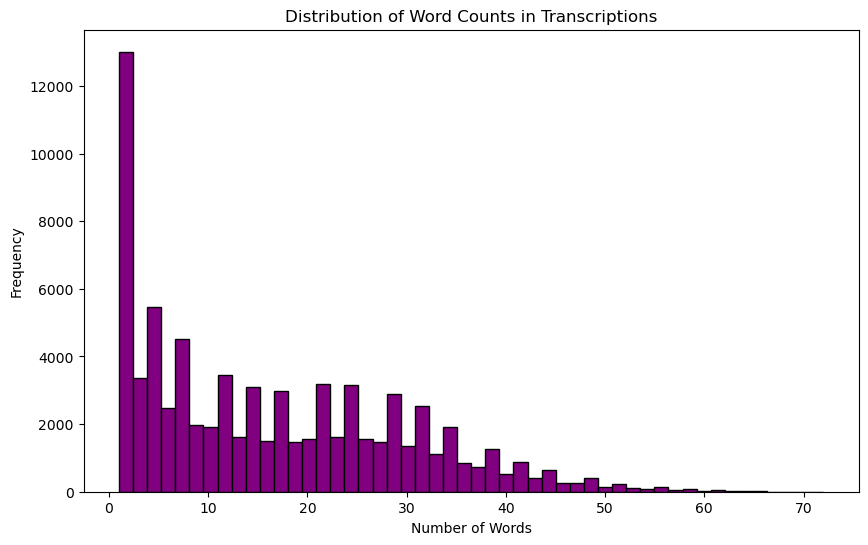

Average word count per transcription: 16.38
Max word count in any transcription: 72
Min word count in any transcription: 1


In [12]:
# Calculate the number of words in each transcription
text_df['word_count'] = text_df['transcription'].str.split().apply(len)

# Visualize the distribution of word counts
plt.figure(figsize=(10, 6))
plt.hist(text_df['word_count'], bins=50, color='purple', edgecolor='black')
plt.title('Distribution of Word Counts in Transcriptions')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Basic statistics about word count
print(f"Average word count per transcription: {text_df['word_count'].mean():.2f}")
print(f"Max word count in any transcription: {text_df['word_count'].max()}")
print(f"Min word count in any transcription: {text_df['word_count'].min()}")


# Pause and Silence Detection

In [13]:
# Find speaker with max and min utterances
max_speaker = max(speaker_counts, key=speaker_counts.get)
min_speaker = min(speaker_counts, key=speaker_counts.get)

print(f"Speaker with the most utterances: {max_speaker} ({speaker_counts[max_speaker]} utterances)")
print(f"Speaker with the least utterances: {min_speaker} ({speaker_counts[min_speaker]} utterances)")


Speaker with the most utterances: KaInDe_utt00000001 (1 utterances)
Speaker with the least utterances: KaInDe_utt00000001 (1 utterances)


In [14]:
import librosa

# Load one example wav file
wav_file_path = r"E:\tts\SPRING_INX_Punjabi_R1\Audio\pa_IN_9828873_20230123_Left.wav"
signal, sr = librosa.load(wav_file_path, sr=None)

# Identify non-silent intervals
non_silent_intervals = librosa.effects.split(signal, top_db=20)

# Get total duration (use keyword arguments)
total_duration = librosa.get_duration(y=signal, sr=sr)

# Calculate non-silent duration
non_silent_duration = sum((end - start) / sr for start, end in non_silent_intervals)

# Print durations
print(f"Total duration: {total_duration:.2f} seconds")
print(f"Non-silent duration: {non_silent_duration:.2f} seconds")


Total duration: 1205.14 seconds
Non-silent duration: 250.85 seconds


# Load and Visualize Audio

Sample Rate: 16000
Duration (seconds): 1205.136


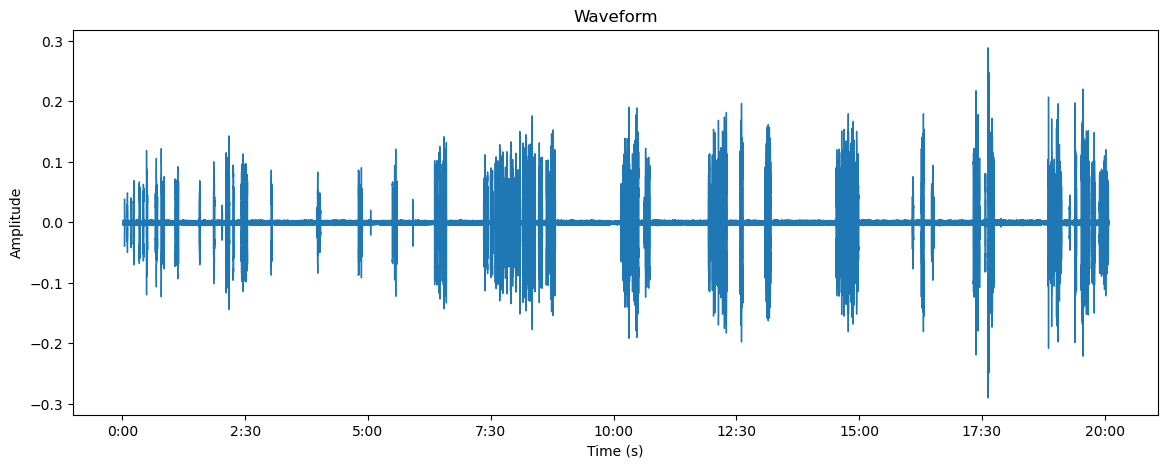

In [15]:
audio_path = r'E:\tts\SPRING_INX_Punjabi_R1\Audio\pa_IN_9828873_20230123_Left.wav'
y, sr = librosa.load(audio_path, sr=None)  # Load with original sampling rate

# Basic Info
print(f"Sample Rate: {sr}")
print(f"Duration (seconds): {librosa.get_duration(y=y, sr=sr)}")

# Plot Waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Calculate and Visualize Spectrogram: The spectrogram shows how the frequencies change over time in the audio.

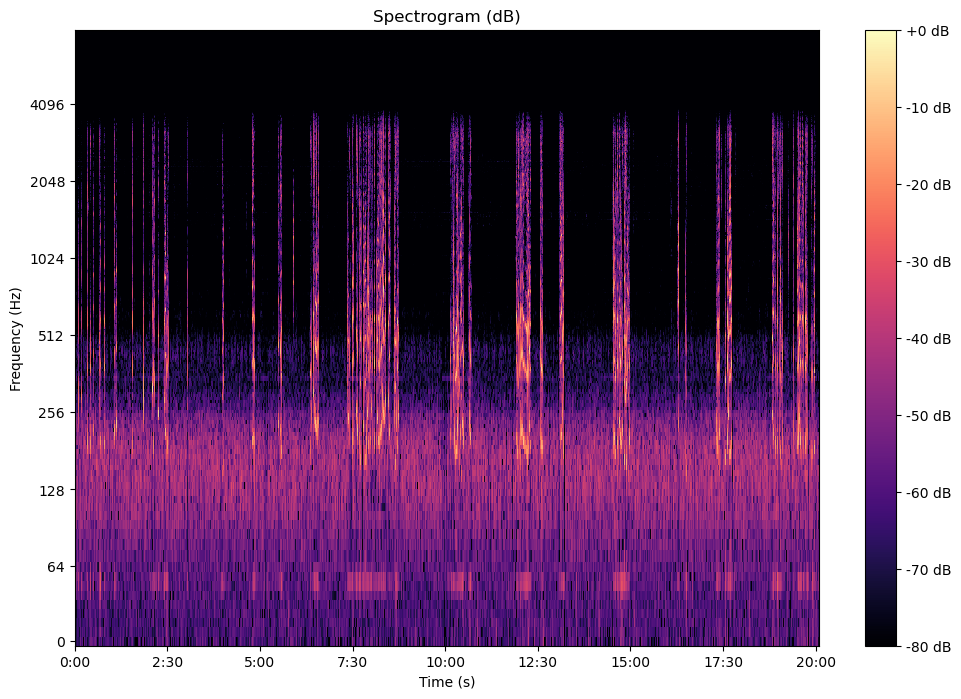

In [16]:
# Generate spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
# Plot spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (dB)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


# Mel Spectogram

In [17]:
audio_path = r'E:\tts\SPRING_INX_Punjabi_R1\Audio\pa_IN_9828873_20230123_Left.wav'
y, sr = librosa.load(audio_path, sr=None)

# Convert to Mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Convert the amplitude to decibels for easier visualization
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

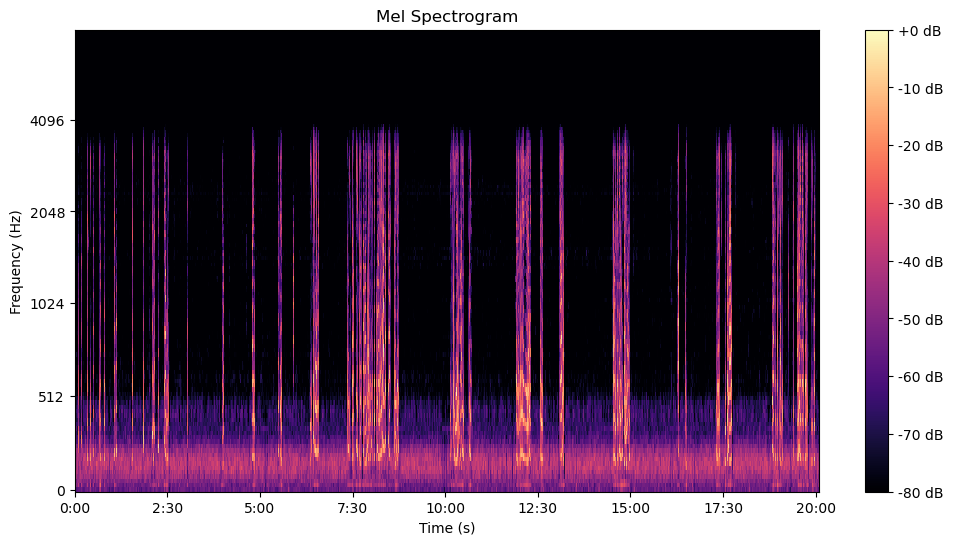

In [18]:
plt.figure(figsize=(12, 6))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


# Extract Audio Features: Common audio features include the zero-crossing rate, spectral centroid, and MFCCs (Mel-frequency cepstral coefficients).

Zero-Crossing Rate: 642859


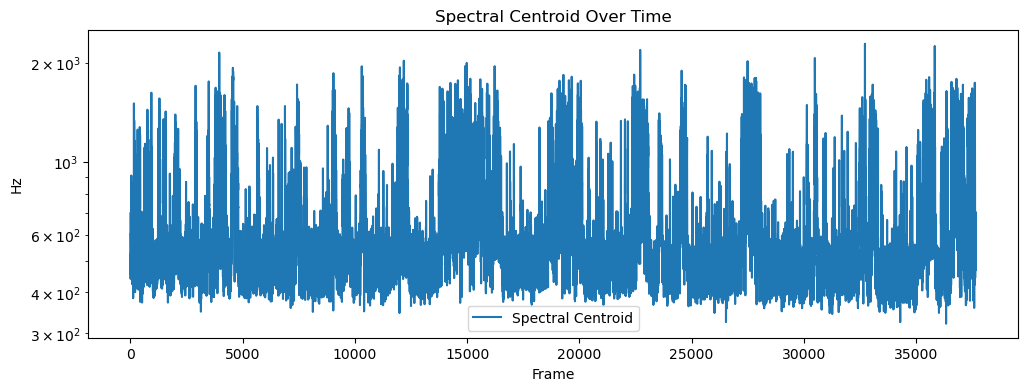

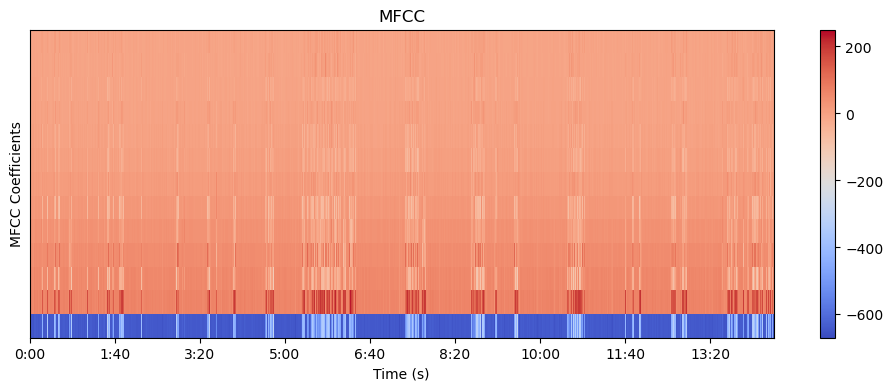

In [17]:
# Zero-Crossing Rate (number of times the signal crosses zero per frame)
zero_crossings = librosa.zero_crossings(y, pad=False)
print(f"Zero-Crossing Rate: {sum(zero_crossings)}")

# Spectral Centroid (center of mass of the spectrum)
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
plt.figure(figsize=(12, 4))
plt.semilogy(spectral_centroid.T, label='Spectral Centroid')
plt.xlabel('Frame')
plt.ylabel('Hz')
plt.legend()
plt.title('Spectral Centroid Over Time')
plt.show()

# MFCCs (Mel-frequency cepstral coefficients)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()
